In [6]:
from src.experiment import *
from src.parameters import *

tfd = tfp.distributions
tfk = tfp.math.psd_kernels

matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["axes.grid"] = True
matplotlib.rcParams["font.size"] = 18
matplotlib.rcParams["figure.figsize"] = (12, 8)
matplotlib.rcParams["savefig.bbox"] = "tight"
# plot-settings:
ps = {
    "GP": {"c": "red", "m": "x"},
    "RF": {"c": "blue", "m": "4"},
    "BNN": {"c": "orange", "m": "v"},
    "DS": {"c": "black", "m": "*"},
    "DE": {"c": "mediumorchid", "m": "2"},
    "RS": {"c": "palegreen", "m": "h"},
}

In [9]:
parameters = Parameters({"n_iterations":10000, 
											"gplvm_learning_rate":0.01,
											"data_dim":200, 
											"n_train":10, 
											"seed":0, 
											# "cluster_std":1, 
											"gp_latent_init_pca":False})
experiment = Experiment(parameters)
experiment.run()
experiment.plot_latent_space()


In [146]:
seeds = list(range(20))
dims = [10,20,30,40,50,60,70,80,90,100]
data = np.full((len(seeds),len(dims)),np.nan)
learning_curves = []
for i_d,dim in enumerate(dims):
	for i_s,seed in enumerate(seeds):
		parameters = Parameters({"n_iterations":1000, 
														"gplvm_learning_rate":0.4,
														"data_dim":dim, 
														"n_train":10, 
														"seed":seed, 
														# "cluster_std":1, 
														"gp_latent_init_pca":False})
		experiment = Experiment(parameters)
		experiment.run()
		learning_curves.append(experiment.model.loss_history)
		data[i_s,i_d] = experiment.nmi
	print(f"dims:{dim}")

dims:10
dims:20
dims:30
dims:40
dims:50
dims:60
dims:70
dims:80
dims:90
dims:100


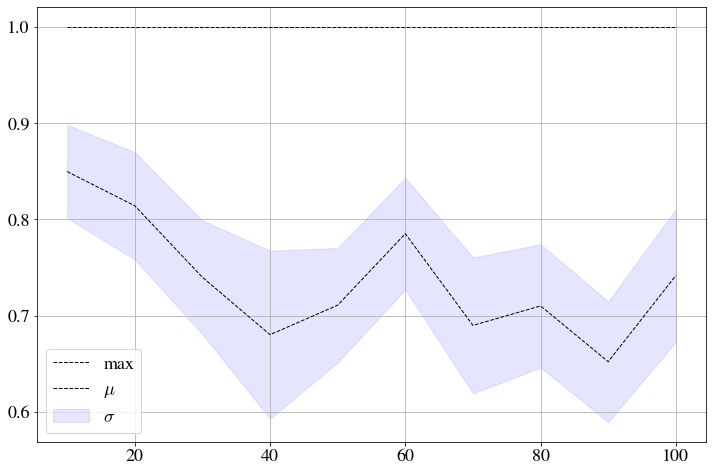

In [147]:
data_max = np.max(data,axis=0)
data_mean = np.mean(data,axis=0)
data_std = np.std(data,axis=0)/np.sqrt(data.shape[0])
fig = plt.figure()
plt.plot(
		dims, data_max, "--", color="black", label=r"max", linewidth=1,
)
plt.plot(
		dims, data_mean, "--", color="black", label=r"$\mu$", linewidth=1,
)
plt.fill_between(
		dims,
		data_mean + data_std,
		data_mean - data_std,
		color="blue",
		alpha=0.1,
		label=r"$\sigma$",
)
plt.legend()
# plt.xscale("log")
plt.show()

In [ ]:

print(experiment.y_preds)
print(experiment.dataset.y)
experiment.plot_learning_curve()
experiment.plot_latent_space(experiment.k_means.cluster_centers_)